In [7]:
from collections import Counter
from dateutil.relativedelta import relativedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors

In [2]:
nrows = None
train = pd.read_csv("training_set_VU_DM.csv", header=0, nrows=nrows, parse_dates=[1])
train["prop_log_historical_price"] = train.prop_log_historical_price.replace(0.0, np.nan)
train["prop_historical_price"] = (np.e ** train["prop_log_historical_price"])
nrows = train.shape[0]

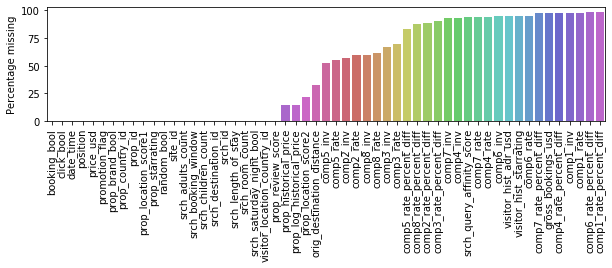

In [14]:
fig, ax = plt.subplots(figsize=(1200/120, 500/120))
d = train.isnull().sum().to_dict()
items = sorted(d.items(), key=lambda kv: (kv[1],kv[0]))

bp = sns.barplot(list(map(lambda kv: kv[0], items)),
                 list(map(lambda kv: 100*kv[1]/nrows, items)),
                 palette = sns.color_palette('hls', n_colors=30))
bp.set_ylabel("Percentage missing")

for item in bp.get_xticklabels():
    item.set_rotation(90)

plt.subplots_adjust(bottom=0.5)
plt.savefig("Images/barplot", dpi=400)

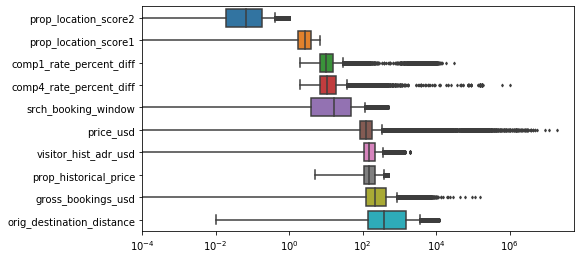

In [50]:
cols = [
        'prop_location_score2',
        'prop_location_score1',
        'comp1_rate_percent_diff',
        'comp4_rate_percent_diff',
        'srch_booking_window',
        'price_usd',
        'visitor_hist_adr_usd',
        'prop_historical_price',
        'gross_bookings_usd',
        'orig_destination_distance',
        ]
fig, axarr = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(data=train[cols], orient='h', fliersize=2)
ax.set_xscale('log')
plt.xlim(xmin=1e-4)
plt.subplots_adjust(left=0.3, bottom=0.1)
plt.savefig("Images/outliers", dpi=400)

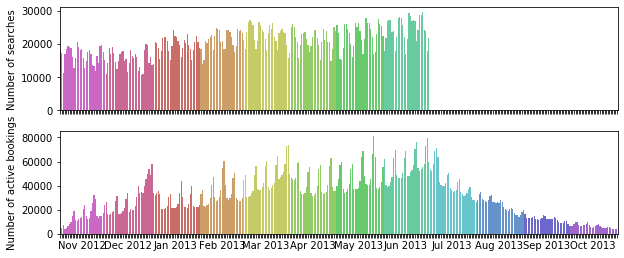

In [16]:
months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def name(x):
    if x[2] == 15:
        return '%s %d' % (months[x[1]], x[0])
    else:
        return ''

df2 = train

dates = [(a.year, a.month, a.day) for a in df2.date_time]
c = sorted(Counter(dates).items(), key=lambda kv: kv[0][0]*10000 + kv[0][1]*100 + kv[0][2])
datesort = [kv[0][0]*10000 + kv[0][1]*100 + kv[0][2] for kv in c]
names = [name(x) for x,y in c]
fig, axarr = plt.subplots(2, sharex=True, figsize=(1200/120, 500/120))
palette = sns.color_palette('hls', n_colors=12)
clrs = [palette[d[0][1]-1] for d in c]
bp1 = sns.barplot(datesort, [y for x,y in c], palette = clrs, ax=axarr[0], linewidth=0)
axarr[0].set_xticklabels(names)

startdates = [x+y for x,y in zip(df2.date_time, [relativedelta(days=x) for x in df2.srch_booking_window])]
staydates = zip(startdates, df2.srch_length_of_stay)
newdates = []
for staydate in staydates:
    for day in range(staydate[1]):
        newdates.append(staydate[0] + relativedelta(days=day))
newdates = [(a.year, a.month, a.day) for a in newdates if a.year < 2013 or (a.year == 2013 and a.month < 11)]
newc = sorted(Counter(newdates).items(), key=lambda kv: kv[0][0]*10000 + kv[0][1]*100 + kv[0][2])
newdatesort = [kv[0][0]*10000 + kv[0][1]*100 + kv[0][2] for kv in newc]
newnames = [name(x) for x,y in newc]
newclrs = [palette[d[0][1]-1] for d in newc]
bp2 = sns.barplot(newdatesort, [y for x,y in newc], palette = newclrs, ax=axarr[1], linewidth=0)
axarr[1].set_xticklabels(newnames)

bp1.set_ylabel("Number of searches")
bp2.set_ylabel("Number of active bookings")

plt.savefig("Images/dateplot", dpi=400)